### 入力した文章が不適切かどうか判定して表示するプログラム

- OpenAI の Moderation API を使用
- API の仕様上、英語以外にはうまく対応してないっぽいので、英語に翻訳してから判定することも可能


In [1]:
import endpoint
import pandas as pd
import matplotlib.pyplot as plt

def get_moral_df(msg,en=False):
    #en=Trueの場合はChatCompletionを使って翻訳する
    if en:
        res_msg,res_data = endpoint.get_moderation_after_translate(msg)
    else:
        res_msg,res_data = endpoint.get_moderation(msg)
    categoriy_flags = res_data["categories"]
    categoriy_scores = res_data["category_scores"]
    # コメントアウトを外すとJSONの中身を確認できる
    # display(categoriy_flags)
    # display(categoriy_scores)

    # 別にdfである必要はないが、可視化のためにdfにしておく
    df_f = pd.DataFrame(pd.json_normalize(categoriy_flags))
    df_s = pd.DataFrame(pd.json_normalize(categoriy_scores))
    return (res_msg,df_f,df_s)

#### msg に判定したい文章を入れる


In [2]:
msg = "中身長…？普通に低身長ですやん"
msg_jp,df_jp_f,df_jp_s = get_moral_df(msg)
#翻訳はここで実行されるたびに結果が変わるので注意（ChatGPTくんにやらせているため）
msg_en,df_en_f,df_en_s = get_moral_df(msg,en=True)

In [3]:
display(df_jp_f)
display(df_jp_s)
display(df_en_f)
display(df_en_s)

,sexual,hate,harassment,self-harm,sexual/minors,hate/threatening,violence/graphic,self-harm/intent,self-harm/instructions,harassment/threatening,violence
0,False,False,False,False,False,False,False,False,False,False,False


,sexual,hate,harassment,self-harm,sexual/minors,hate/threatening,violence/graphic,self-harm/intent,self-harm/instructions,harassment/threatening,violence
0,0.000229,0.003814,0.013523,0.000019,4.122964e-07,0.000001,0.000005,0.000031,0.000025,0.000015,0.000016


,sexual,hate,harassment,self-harm,sexual/minors,hate/threatening,violence/graphic,self-harm/intent,self-harm/instructions,harassment/threatening,violence
0,False,False,False,False,False,False,False,False,False,False,False


,sexual,hate,harassment,self-harm,sexual/minors,hate/threatening,violence/graphic,self-harm/intent,self-harm/instructions,harassment/threatening,violence
0,4.228812e-07,0.00016,0.003556,2.116575e-09,8.348712e-10,2.411473e-11,3.523169e-08,3.138589e-09,4.071240e-08,9.862846e-07,1.162712e-07


#### グラフのプロット


Original:中身長…？普通に低身長ですやん
Translated:How tall are you? You're just short.


/tmp/ipykernel_1302302/137831274.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_jp_s.iloc[0])
/tmp/ipykernel_1302302/137831274.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_en_s.iloc[0])


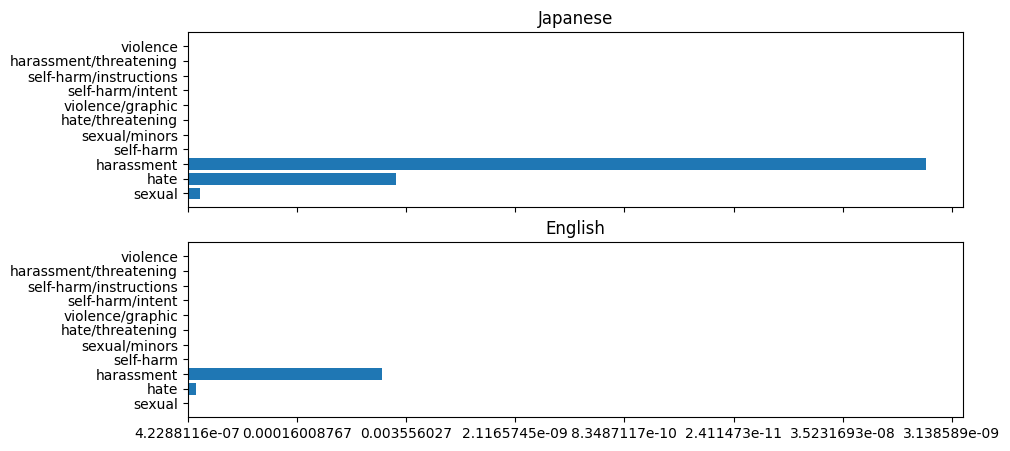

In [4]:
print(f"Original:{msg_jp}")
print(f"Translated:{msg_en}")

#TODO 指数表記が見づらいのでわかりやすい表記にする
fig, (ax1, ax2) = plt.subplots(2,1,sharex="all", figsize=(10, 5))

ax1.barh(df_jp_s.columns,df_jp_s.iloc[0])
ax1.set_xticklabels(df_jp_s.iloc[0])
ax1.set_title('Japanese')

ax2.barh(df_en_s.columns,df_en_s.iloc[0])
ax2.set_xticklabels(df_en_s.iloc[0])
ax2.set_title('English')

plt.show()